In [10]:
# Importing Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# Import the necessary libraries
# Data manipulation and numerical operations
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns  # For creating attractive and informative statistical graphics
import matplotlib.pyplot as plt  # For plotting graphs and charts

# Machine learning model metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score, classification_report,
                             precision_score, recall_score, f1_score,
                             confusion_matrix)

# Setting maximum limit of the number of columns visible
pd.set_option('display.max_columns', 30)

In [12]:
# Importing the dataset
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/data.csv')

# View the data
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.2419                 0.07871     1.0950      0.9053         8.589   
1         0.1812                 0.05667     0.5435      0.7339         3.398   
2         0.2069                 0.05999     0.7456      0.7869         4.585   
3         0.2597                 0.09744     0.4956      1.1560         3.445   
4         0.1809                 0.05883     0.7572      0.7813         5.438   

   ...  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  \
0  ...       0.05373            0.01587      0.03003              0.006193   
1  ...       0.01860            0.01340      0.01389              0.003532   
2  ...       0.03832            0.02058      0.02250              0.004571   
3  ...       0.05661            0.01867      0.05963              0.009208   
4  ...       0.05688            0.01885      0.01756              0.005115   

   radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0         25.38          17.33           184.60      2019.0            0.1622   
1         24.99          23.41           158.80      1956.0            0.1238   
2         23.57          25.53           152.50      1709.0            0.1444   
3         14.91          26.50            98.87       567.7            0.2098   
4         22.54          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [13]:
# Drop the unwanted columns
data.drop(columns=['id','Unnamed: 32'],inplace=True)
data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.2419                 0.07871     1.0950      0.9053         8.589   
1         0.1812                 0.05667     0.5435      0.7339         3.398   
2         0.2069                 0.05999     0.7456      0.7869         4.585   
3         0.2597                 0.09744     0.4956      1.1560         3.445   
4         0.1809                 0.05883     0.7572      0.7813         5.438   

   area_se  ...  compactness_se  concavity_se  concave points_se  symmetry_se  \
0   153.40  ...         0.04904       0.05373            0.01587      0.03003   
1    74.08  ...         0.01308       0.01860            0.01340      0.01389   
2    94.03  ...         0.04006       0.03832            0.02058      0.02250   
3    27.23  ...         0.07458       0.05661            0.01867      0.05963   
4    94.44  ...         0.02461       0.05688            0.01885      0.01756   

   fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  \
0              0.006193         25.38          17.33           184.60   
1              0.003532         24.99          23.41           158.80   
2              0.004571         23.57          25.53           152.50   
3              0.009208         14.91          26.50            98.87   
4              0.005115         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [14]:
# Check the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [15]:
# EDA

# Checking class imbalance
data.diagnosis.value_counts(normalize=True)

diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64

In [16]:
# Encoding the target variable

data['diagnosis'] = np.where(data['diagnosis'] == 'M', 1, 0)
data['diagnosis'][:5]

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [17]:
# Finding out the correlation between the features (using a heatmap)
# Find the correlation
corr = data.corr()
corr.shape

(31, 31)

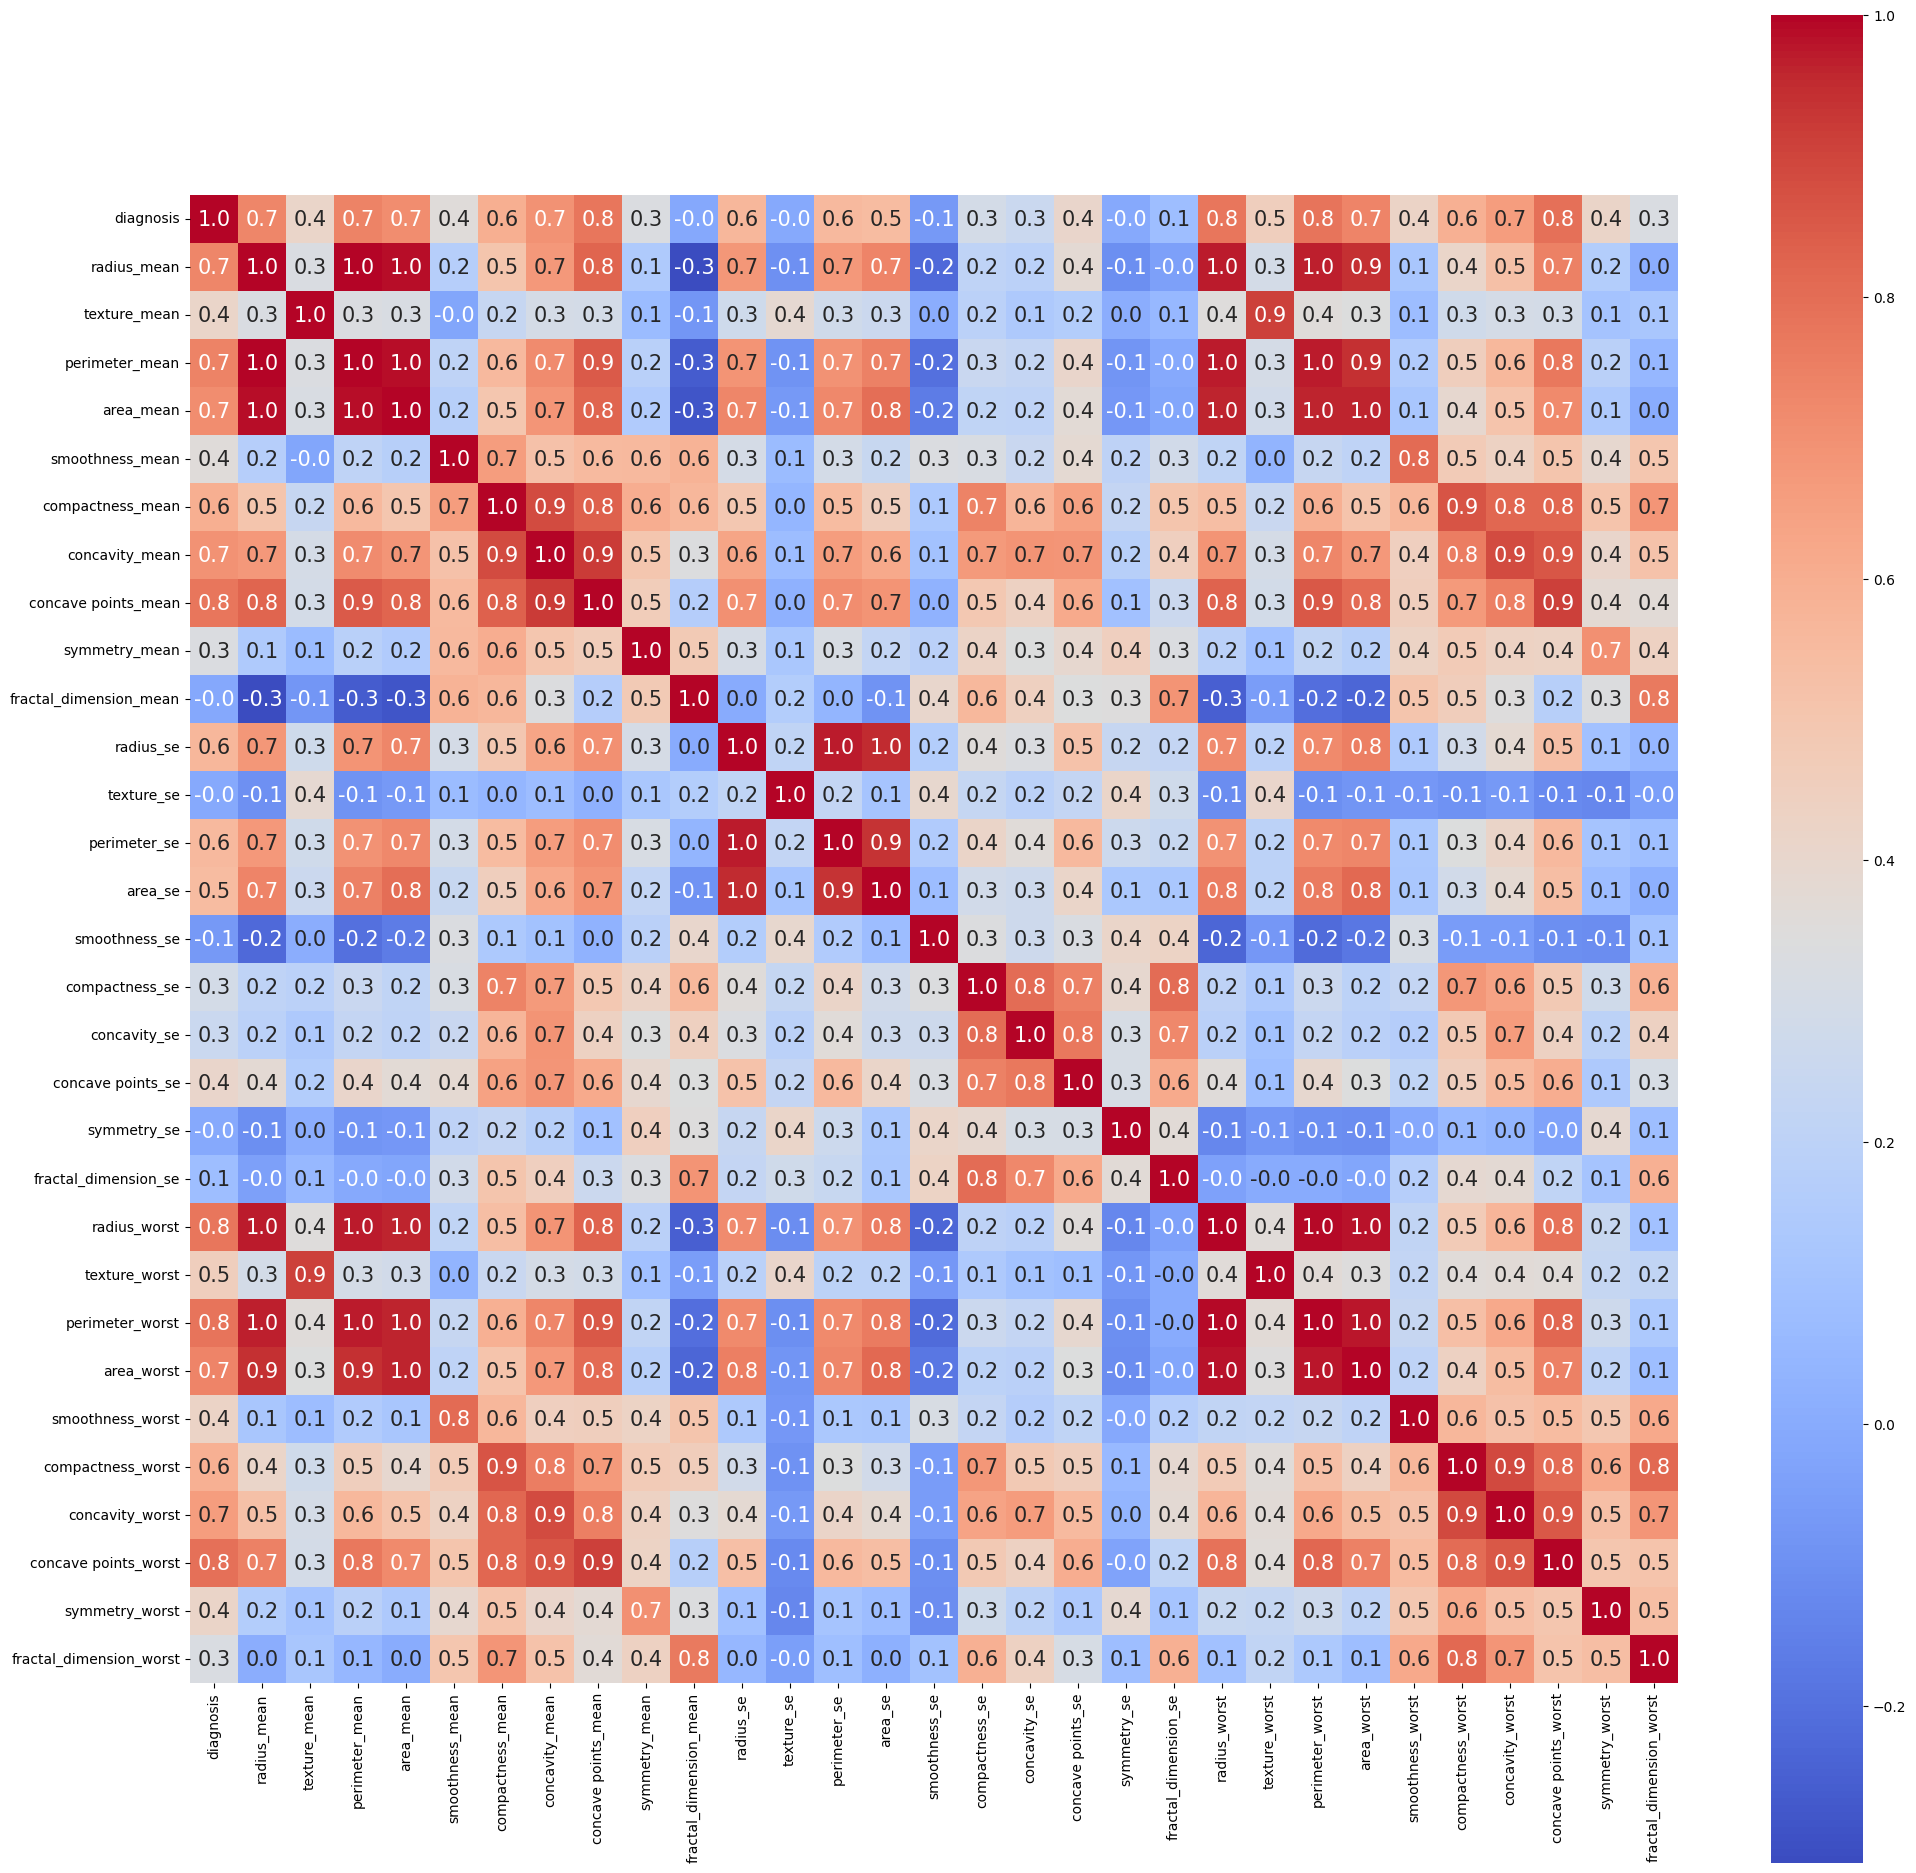

In [18]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(24,24))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='coolwarm')
plt.show()

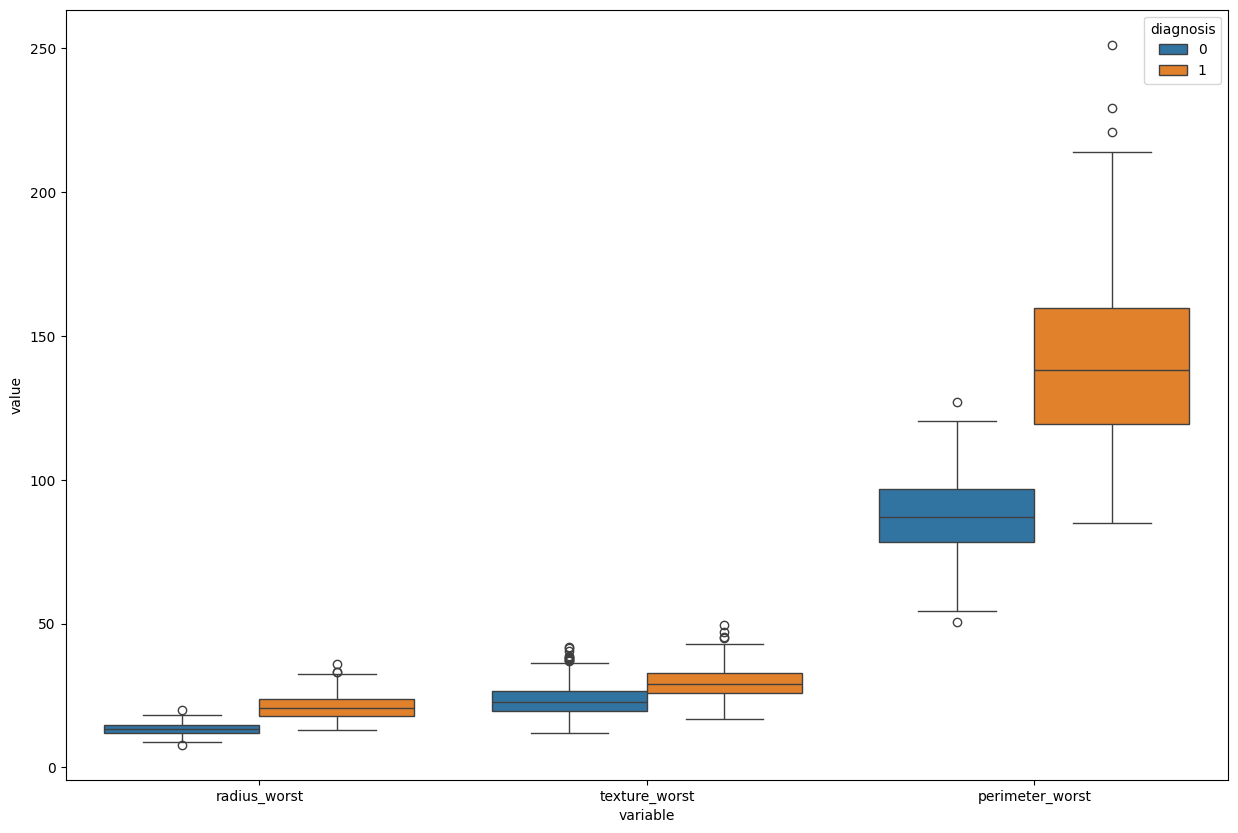

In [19]:
# Transform the DataFrame from wide to long format
melted_data = pd.melt(data, id_vars="diagnosis", value_vars=['radius_worst', 'texture_worst', 'perimeter_worst'])

# Set the figure size for better visualization
plt.figure(figsize=(15, 10))

# Create a box plot to compare the distributions of 'radius_worst', 'texture_worst', and 'perimeter_worst'
# for each 'diagnosis' (M = malignant, B = benign)
sns.boxplot(x="variable", y="value", hue="diagnosis", data=melted_data)

# Display the plot
plt.show()

In [20]:
# List down all the columns
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

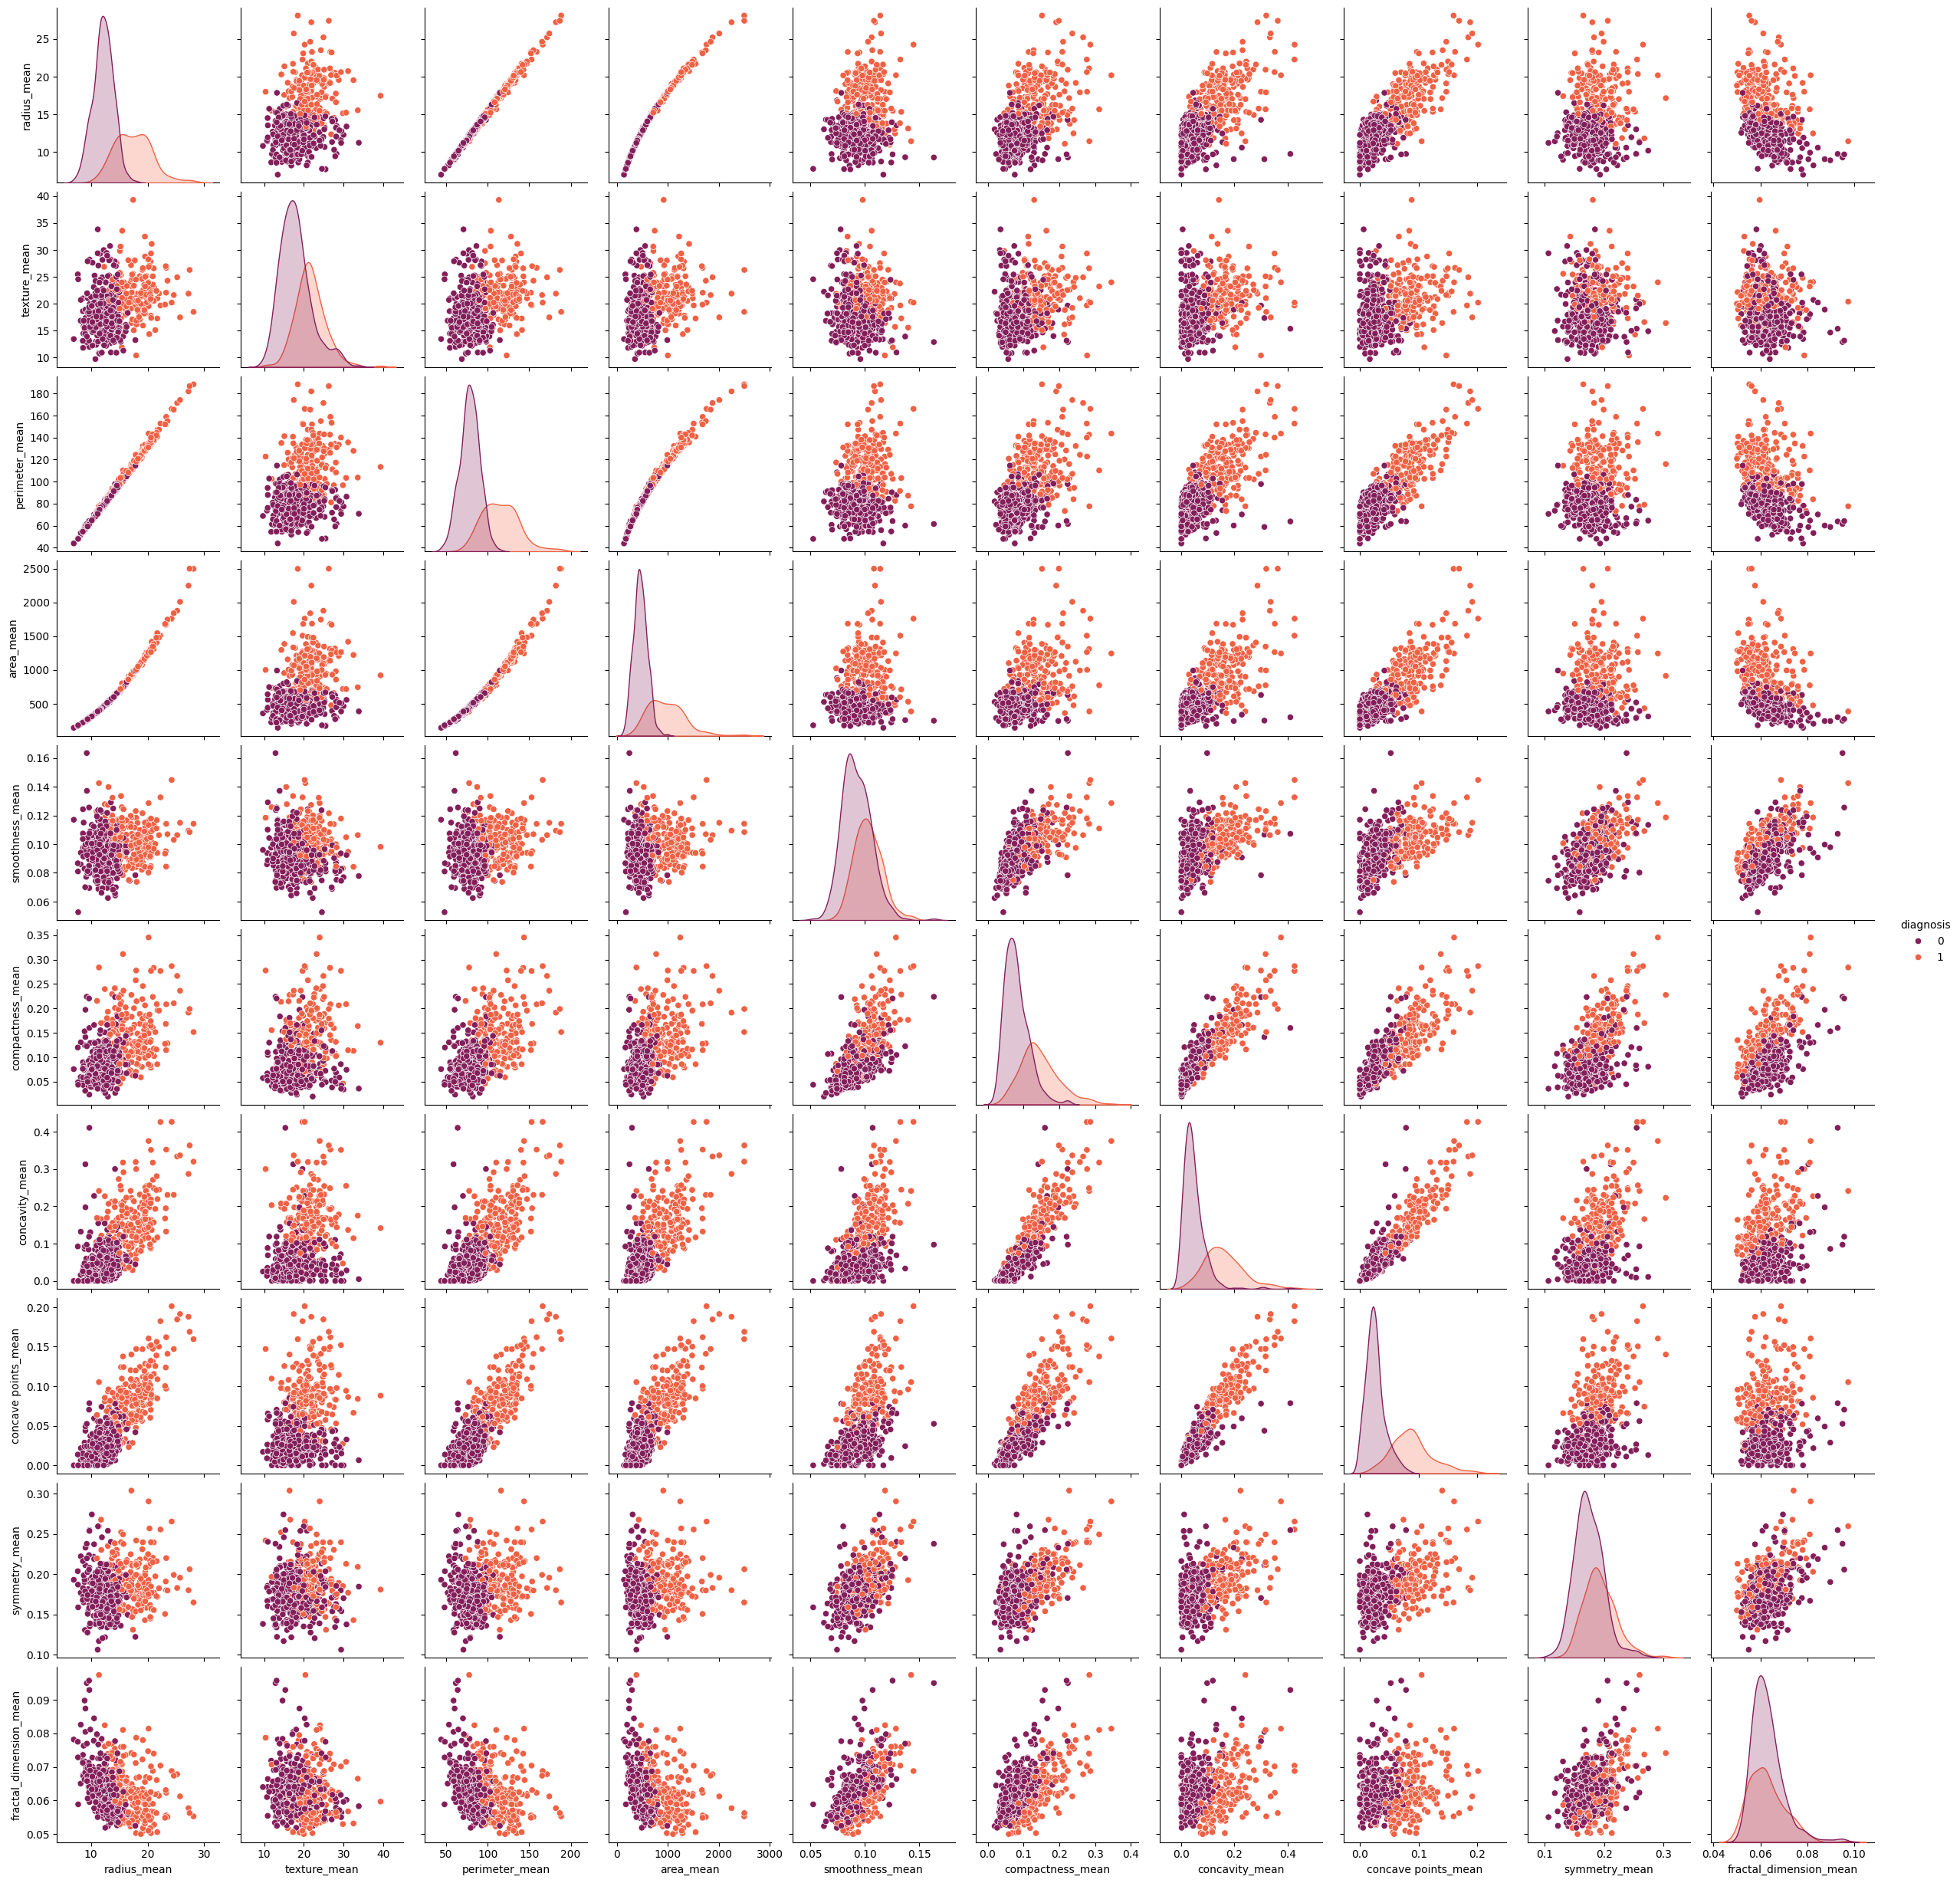

In [21]:
# List down the 'mean' columns:

columns = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

# Visualize using the pairplot
sns.pairplot(data=data[columns], hue="diagnosis", palette='rocket')

In [22]:
# Model+ Building

# Import the required libraries
from sklearn.tree import DecisionTreeClassifier

# Separate features and target variable
X = data.drop(columns=['diagnosis'])  # Features
y = data['diagnosis']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
dt.fit(X_train, y_train)

# Predict on the test set
y_pred = dt.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.9474
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



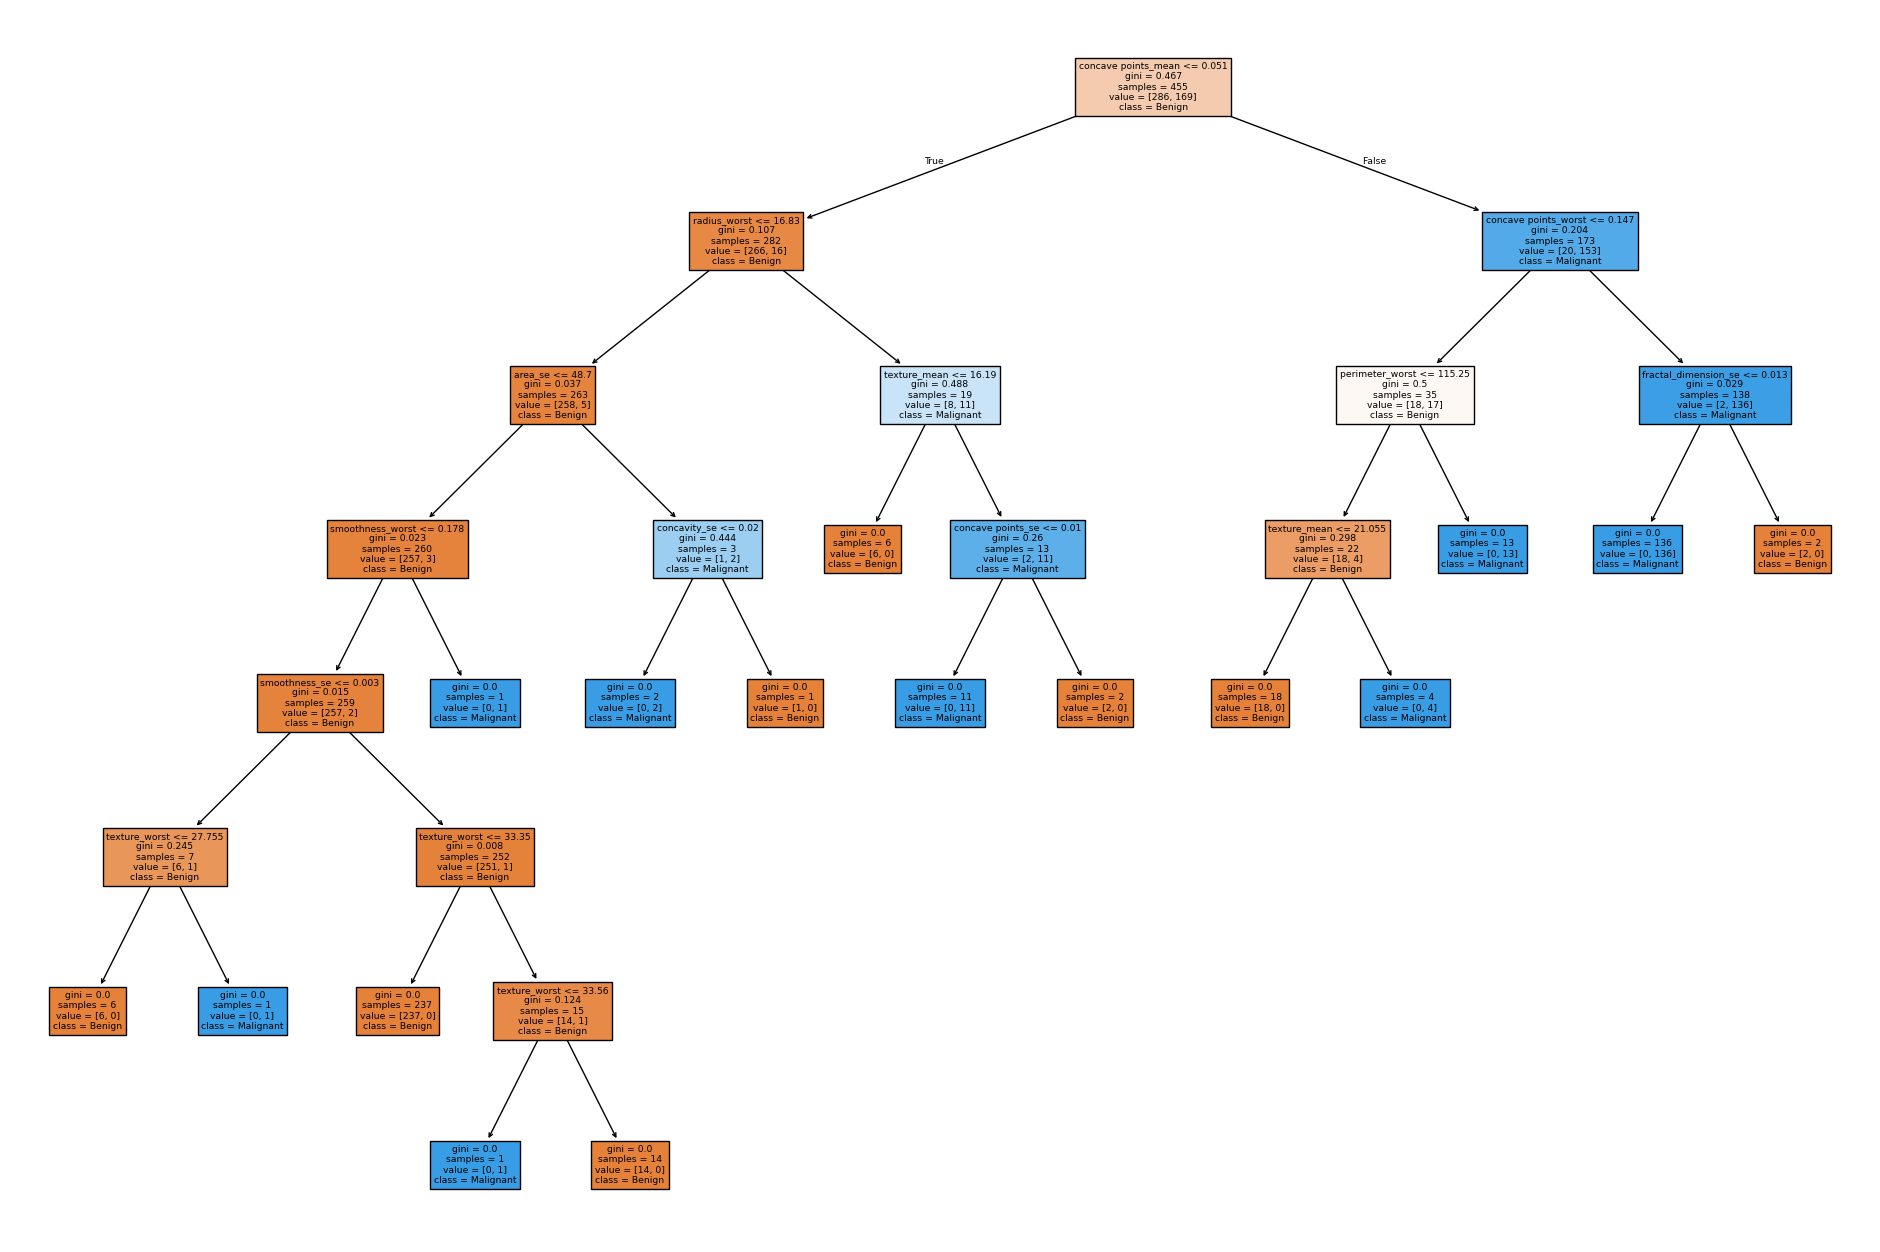

In [23]:
# Visualize the decision tree
from sklearn import tree

# Plot the decision tree
plt.figure(figsize=(24,16))
tree.plot_tree(dt, filled=True, feature_names=X.columns, class_names=['Benign', 'Malignant'])
plt.show()


## Entropy Explained

**What It Is:**  
Entropy is a measure of uncertainty or disorder in a node of a decision tree. It quantifies the unpredictability or impurity of the node's class distribution.

**Formula:**  
Entropy = − Σ (pᵢ × log₂(pᵢ))  
Where pᵢ is the proportion of samples belonging to class i in the node.

**Interpretation:**  
- 0 → The node is *pure* (all samples belong to one class); no uncertainty.  
- 1 → The node is *maximally impure* (classes are evenly mixed); high uncertainty.

**Why It Matters:**  
Decision trees use entropy to determine the best feature splits. A lower entropy after a split indicates that the classes are better separated, leading to more confident and accurate predictions.


In [24]:
# Using Entropy as the criterion

# Build a decision tree classifier which uses 'entropy' as the splitting criterion
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Fit the model
dt_entropy.fit(X_train, y_train)

# Predict using the model
y_pred = dt_entropy.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        71
           1       0.97      0.88      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



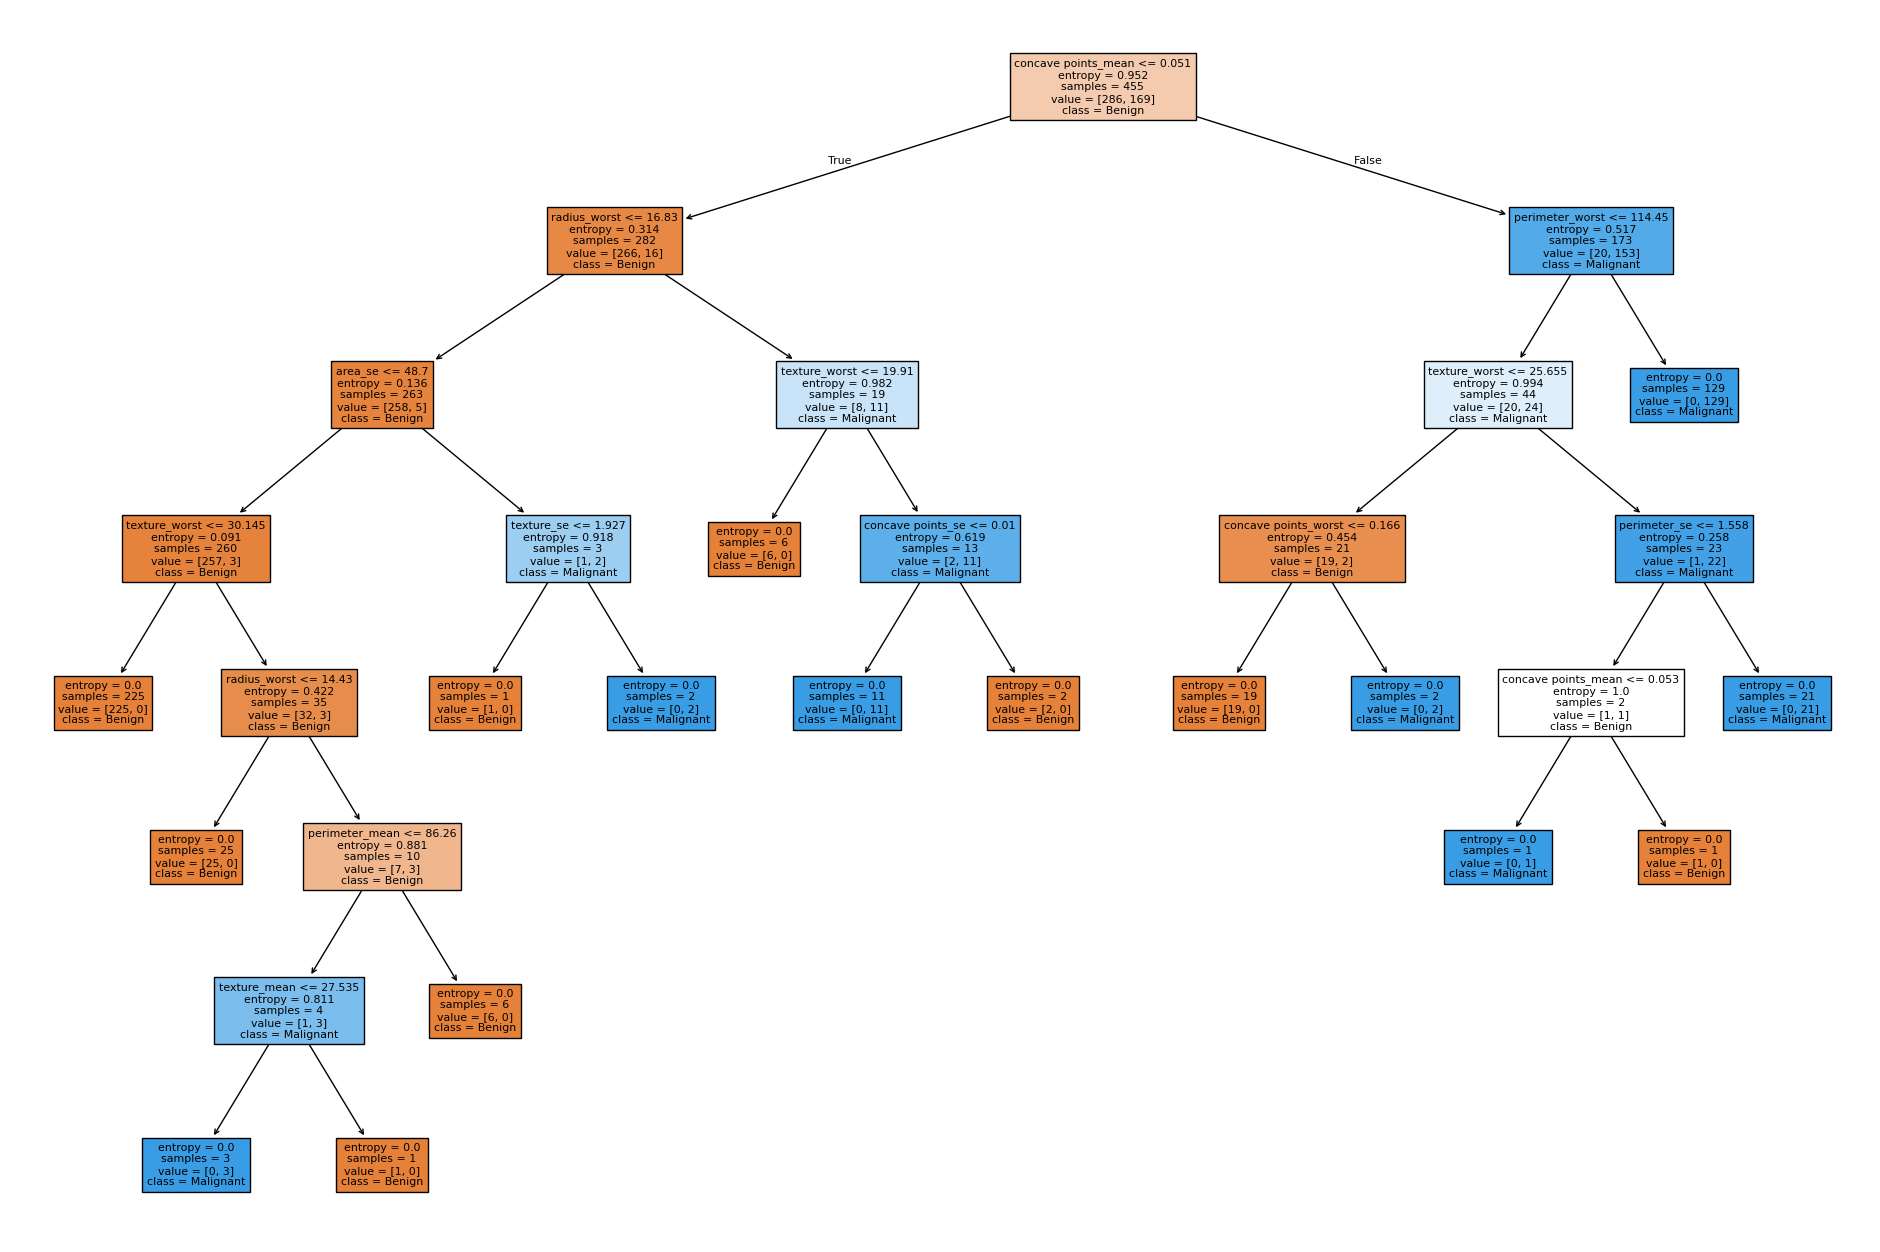

In [25]:
# Visualize the decision tree
from sklearn import tree

# Plot the decision tree
plt.figure(figsize=(24,16))
tree.plot_tree(dt_entropy, filled=True, feature_names=X.columns, class_names=['Benign', 'Malignant'])
plt.show()

## The model has good accuracy. But, is it solving the purpose?

The goal is to identify the malignant tumours properly. How efficient is this model in doing that?

To answer this, one must understand about Type 1 and Type 2 errors.

General Explanation:

Type 1 Error (False Positive): This occurs when the model incorrectly predicts a positive outcome when the actual outcome is negative. In other words, it’s a "false alarm."

Example: The model incorrectly classifies a benign tumor (non-cancerous) as malignant (cancerous). This could lead to unnecessary stress for the patient and possibly unnecessary treatments or further invasive diagnostic procedures.
Type 2 Error (False Negative): This happens when the model incorrectly predicts a negative outcome when the actual outcome is positive. This is a "missed detection."

Example: The model incorrectly classifies a malignant tumor (cancerous) as benign (non-cancerous). This is more serious, as it could lead to a delay in treatment for a patient who actually has cancer, potentially worsening their prognosis.

In [26]:
# Import the required libraries
from sklearn.metrics import confusion_matrix

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract the components of the confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

# Calculate Type 1 Error Rate (False Positive Rate)
type_1_error_rate = FP / (FP + TN)

# Calculate Type 2 Error Rate (False Negative Rate)
type_2_error_rate = FN / (FN + TP)

print(f'Type 1 Error Rate (False Positive Rate): {type_1_error_rate:.4f}')
print(f'Type 2 Error Rate (False Negative Rate): {type_2_error_rate:.4f}')

Type 1 Error Rate (False Positive Rate): 0.0141
Type 2 Error Rate (False Negative Rate): 0.1163


In [27]:
# Performing PCA & reducing the dimensions of the data

# Import the required module
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler # Import StandardScaler for feature scaling

# Scale the features using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop(columns=['diagnosis']))

# Applying PCA
pca = PCA(n_components=10)  # Starting with 10 components to visualize
principal_components = pca.fit_transform(scaled_features)

# Explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_

# Create a list of (Principal Component, Variability) tuples and sort them in descending order
components_variability = [(f'PC{i+1}', var) for i, var in enumerate(explained_variance)]
components_variability.sort(key=lambda x: x[1], reverse=True)

# Print the variability captured by each component
for component, variability in components_variability:
    print(f'{component}: {variability:.4f}')

PC1: 0.4427
PC2: 0.1897
PC3: 0.0939
PC4: 0.0660
PC5: 0.0550
PC6: 0.0402
PC7: 0.0225
PC8: 0.0159
PC9: 0.0139
PC10: 0.0117


In [28]:
# PCA + Decision Tree Classifier

# Apply PCA to reduce to the first 7 principal components
pca = PCA(n_components=7)
X_pca = pca.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict on the test set
y_pred = dt.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.9211
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94        71
           1       0.89      0.91      0.90        43

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



In [29]:
# Calculating the error metrics
# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract the components of the confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

# Calculate Type 1 Error Rate (False Positive Rate)
type_1_error_rate = FP / (FP + TN)

# Calculate Type 2 Error Rate (False Negative Rate)
type_2_error_rate = FN / (FN + TP)

print(f'Type 1 Error Rate (False Positive Rate): {type_1_error_rate:.4f}')
print(f'Type 2 Error Rate (False Negative Rate): {type_2_error_rate:.4f}')

Type 1 Error Rate (False Positive Rate): 0.0704
Type 2 Error Rate (False Negative Rate): 0.0930


## Section 6: Moving from Trees to Forest

In [30]:
# Import required libraries
from sklearn.ensemble import RandomForestClassifier

# Separate features and target
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=30, random_state=42)

# Train the classifier on the training data
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.9649
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [31]:
# Get feature importances from the model
feature_importances = rf.feature_importances_

# Create a DataFrame for easy interpretation
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the most important features
print("Important Features:")
print(importance_df)

Important Features:
                    Feature  Importance
7       concave points_mean    0.140346
27     concave points_worst    0.135614
23               area_worst    0.106174
6            concavity_mean    0.088254
0               radius_mean    0.063394
22          perimeter_worst    0.051721
13                  area_se    0.051239
20             radius_worst    0.049325
3                 area_mean    0.047140
2            perimeter_mean    0.044887
10                radius_se    0.038799
25        compactness_worst    0.025685
5          compactness_mean    0.023682
21            texture_worst    0.018344
1              texture_mean    0.017826
26          concavity_worst    0.015666
16             concavity_se    0.008979
12             perimeter_se    0.008412
24         smoothness_worst    0.008002
29  fractal_dimension_worst    0.006886
28           symmetry_worst    0.006255
19     fractal_dimension_se    0.006114
17        concave points_se    0.005975
4           smoothne

## Interpretation

Random Forest has slightly higher metrics compared to decision tree model.
Feature importance in a Random Forest model helps identify which features have the most significant impact on the model's predictions. By analyzing the feature_importances_ attribute, you can determine how much each feature contributes to the final decision-making process. This is particularly useful for understanding the model's behavior and for selecting the most relevant features in the dataset. The features with the highest importance scores are those that the model relied on most heavily to differentiate between classes, providing valuable insights for both model refinement and interpretation.